# Reinforced concrete section analysis

In this notebook a reinforced concrete section is analysed. To analyse the stresses and strains within the section, *groups* module is used, which enables to generate MN-interaction diagrams.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../libraries')
import groups as grp
import sections as sect
import materials as mat
import utils

## Define materials

First, concrete and reinforcement material properties need to be defined. Materials cab be defined using *materials* module.

### Concrete

Three ways to define concrete material properties are available. C50/60 concrete with characteristic cylinder strength of 50 MPa is analysed in this example.

In [2]:
fc = 50 # MPa
Ec = 30000 # MPa

#### Concrete equivalent stress block (esb1)

This approach is typically used in Eurocode 2. The strength of the concrete block is taken as $0.85f_{c}$.

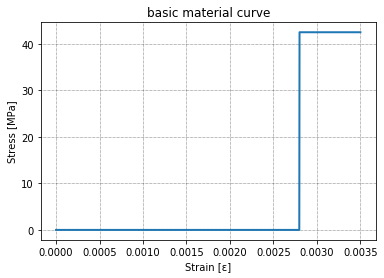

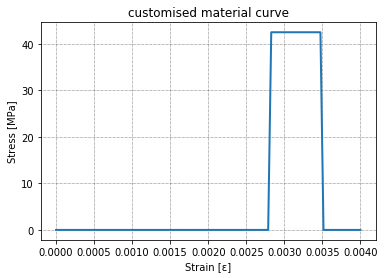

,type,$$f_{u1}[MPa]$$,$$e_{u}$$,$$\lambda$$
esb1,esb1,42.5,0.0035,0.8


In [3]:
conMat = mat.esb1(fu = 0.85*fc, lamb = 0.8, epsilon_u = 0.0035, )
conMat.basicCurve(title='basic material curve')
conMat.plot(strain=np.linspace(0,0.004,num=100),title='customised material curve')
conMat.prop

#### Concrete as elastic perfectly plastic material (epm1)

This is a bilinear elasto-plastic material model. The strength of the concrete block is taken as $0.85f_{c}$.

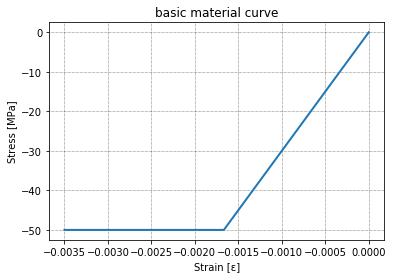

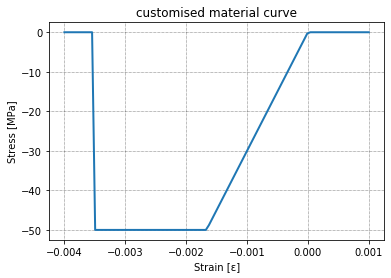

,type,$$E_{1}[MPa]$$,$$E_{2}[MPa]$$,$$f_{y}[MPa]$$,$$f_{u}[MPa]$$,$$e_{y}$$,$$e_{u}$$,$$mu$$
epm1,epm1,30000,0.0,50,50,0.0016666666666666668,0.0035,0.0


In [4]:
conMat = mat.epm1(E1 = Ec, fy = fc, fu = fc, epsilon_u = 0.0035,tension=False)
conMat.basicCurve(title='basic material curve')
conMat.plot(strain=np.linspace(-0.004,0.001,num=100),title='customised material curve')
conMat.prop

### Concrete with quadratic and cubic overlays (con1)

This is a trilinear concrete model, with optional quadratic and cubic overlays.

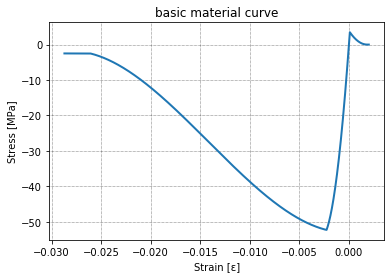

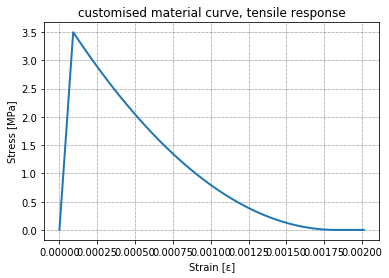

,type,$$f_{c1}[MPa]$$,$$f_{c2}[MPa]$$,$$f_{t}[MPa]$$,$$E_{c0}[MPa]$$,$$E_{c1}[MPa]$$,$$E_{c2}[MPa]$$,$$E_{t1}[MPa]$$,$$E_{t2}[MPa]$$,$$e_{c1}$$,$$e_{c2}$$,$$e_{t1}$$,$$e_{t2}$$,$$alpha_{c}$$,$$alpha_{t}$$
con1,con1,-50,-2.5,3.5,38705.59,23177,-2088,38629,-2013,-0.0021573111274107953,-0.0261036712806675,9.060550363716378e-05,0.0018293039636470992,-0.67,-1


In [5]:
Ec1,fc1,Ec2,fc2,Et1,ft,Et2,alphac,alphat=[23177, -50, -2088, -2.5, 38629, 3.5, -2013, -0.67, -1]
conMat=mat.con1(Ec1,fc1,Ec2,fc2,Et1,ft,Et2,alphac,alphat)
conMat.basicCurve(title='basic material curve')
conMat.plot(strain=np.arange(0,1.1*conMat.eps_t2,0.000001),title='customised material curve, tensile response')
conMat.prop

#### Generate concrete properties

Concrete properties for *con1* material can be generated using a subclass *con1gen*.

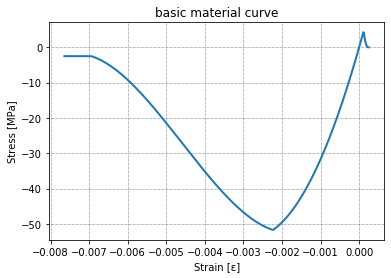

,type,$$f_{c1}[MPa]$$,$$f_{c2}[MPa]$$,$$f_{t}[MPa]$$,$$E_{c0}[MPa]$$,$$E_{c1}[MPa]$$,$$E_{c2}[MPa]$$,$$E_{t1}[MPa]$$,$$E_{t2}[MPa]$$,$$e_{c1}$$,$$e_{c2}$$,$$e_{t1}$$,$$e_{t2}$$,$$alpha_{c}$$,$$alpha_{t}$$
con1gen,con1gen,-50,-2.5,4.49510579008738,38629.08825157563,23177.45295094538,-10443.17260141322,38629.08825157563,-39489.57584445969,-0.0021572689676395422,-0.0069450860332345085,0.00011636582672654798,0.00023019601340144575,-0.6666666666666666,-1


In [6]:
conMat=mat.con1gen(fc1 = 50, length = 250)
conMat.basicCurve(title='basic material curve')
conMat.prop

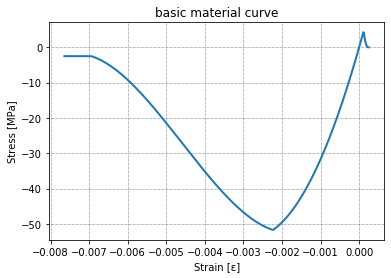

,type,$$f_{c1}[MPa]$$,$$f_{c2}[MPa]$$,$$f_{t}[MPa]$$,$$E_{c0}[MPa]$$,$$E_{c1}[MPa]$$,$$E_{c2}[MPa]$$,$$E_{t1}[MPa]$$,$$E_{t2}[MPa]$$,$$e_{c1}$$,$$e_{c2}$$,$$e_{t1}$$,$$e_{t2}$$,$$alpha_{c}$$,$$alpha_{t}$$
con1gen,con1gen,-50,-2.5,4.49510579008738,38629.08825157563,23177.45295094538,-10443.17260141322,38629.08825157563,-39489.57584445969,-0.0021572689676395422,-0.0069450860332345085,0.00011636582672654798,0.00023019601340144575,-0.6666666666666666,-1


In [7]:
conMat=mat.con1gen(fc1 = 50, length = 250)
conMat.basicCurve(title='basic material curve')
conMat.prop

In [8]:
conMat.adaptic_print()

['con1',
 23177.45295094538,
 50,
 -10443.17260141322,
 2.5,
 38629.08825157563,
 4.49510579008738,
 -39489.57584445969,
 -0.6666666666666666,
 -1]

In [9]:
('C50', 'con1', 23100, 50, -10400, 2.5, 38600, 4.5, -40900)

('C50', 'con1', 23100, 50, -10400, 2.5, 38600, 4.5, -40900)

In [10]:
asas

NameError: name 'asas' is not defined

### Reinforcement

Reinforcement is defined using *epm1* class.

In [ ]:
reinfMat = mat.epm1(205000, 500, 560, 0.075)
reinfMat.basicCurve()
reinfMat.plot(strain=np.linspace(-1.1*reinfMat.epsilon_u,1.1*reinfMat.epsilon_u,num=100),title='customised material curve')
reinfMat.prop

## Define sections

The sections can be defined as rectangular or T-sections. The reinforcement across the section width is uniformly distributed across its width on the plots and is only informative. Sections cab be defined using *sections* module.

### Rectagular section

This section can be defined using *rcrs* class.

In [ ]:
reinf_sect = [[2, 20, 40],[2,20,260]]
section=sect.rcrs(300,300,reinf_sect)
section.plotting(reverse=False)

In [ ]:
reinf_sect = [[5, 32, 600],[2,25,50]]
section=sect.rcrs(500,650,reinf_sect)
section.plotting(reverse=False,title='Section 1')

### T-section

This section can be defined using *rcts* class.

In [ ]:
reinf_sect = [[3, 25, 707.5], [4, 25, 42.5]]
section=sect.rcts(190,560,650,340,reinf_sect)
section.plotting(reverse=True,title='Section 2')
# reverse=True plots the section upside down but it does not result in reversed section layout

In [ ]:
reinf_sect = [[3, 25, 707.5], [4, 25, 42.5], [2, 40, 90], [2, 40, 630]]
section=sect.rcts(190,560,650,340,reinf_sect)
section.plotting(reverse=False,title='Section 3')

## Define groups

A group is composed of a section and corresponding materials and can be defined using *groups* module. This allows to carry out a strain / stress analysis. A reinforced concrete section can be defined using *rc* class.

In [ ]:
rc_section=grp.rc(conMat,reinfMat,section)

### Strains and stresses within section

To show how the stresses and strains vary across the section, a few examples of stress distribution for concrete and steel materials are shown. This is based on the user choice of strains and/or the position of neutral axis. 

Positive moment indicates compression close to 0 x-coordinate and tension in the most furthest fibre on the x-axis.

In [ ]:
# In this example, the compressive strain at the top of the section (0.0 x-coordinate) is 0.0035 
# and tension at the bottom of the section on 0.002

f_tot,m_tot=rc_section.calc(eps0=-0.0035,epsH=0.0022, plotting=True,n_layers=800)

In [ ]:
f_tot,m_tot=rc_section.calcX0(eps0=-0.0035,x_NA=218.5, plotting=True,n_layers=1000)

In [ ]:
f_tot,m_tot=rc_section.calcXH(epsH=-0.0035,x_NA=90, plotting=True,n_layers=800)

### MN cuve

M-N curve is plotted, within which boundaries the design bending moments should be maintained.

In [ ]:
# Sagging moment (tension at height = 0) -ve for reverseMoment= False
# Sagging moment (tension at height = 0) +ve for reverseMoment= True

points=[[1000,-6000]] # Points=[[M1,F1],[M2,F2]]
reverseMoment=False
mnInteraction = rc_section.mnCurve(xRatio=[0.05,0.16,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.3,2,5,1E99],n_layers=100,epsU=-0.0035,reverseMoment=reverseMoment,points=points)

In [ ]:
# Find exact moments at given axial load
axial = 0 # kN
find = utils.findExactPoint(np.array(mnInteraction).T,0,limY=False, multiple=True)
print('Exact moment at axial load axial {} kN are {} kNm and {} kNm'.format(axial,int(find[1][0]),int(find[1][1])))

### Load MN-curve from csv file

Read csv file to load MN-curve. This could be used for comparison with other commercial software e.g. Response2000.

In [ ]:
points=[[2000,-6000],[-1000,-3000]] # points=[[M1,F1],[M2,F2]]
path = "../assets/Response2K/DFrame_fc50_full.csv"
reverseMoment=True
labels = ['MN curve','Response2k','M1','M2'] # if automatic use labels = None
mnInteraction = rc_section.mnCurve(xRatio=[0.05,0.16,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.3,2,5,1E99],n_layers=100,epsU=-0.0035,reverseMoment=reverseMoment,labels=labels,points=points,r2kPath=path,legend=True)